# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
# Libraries

import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [2]:
# your code here

def roll_dice():
    dice_rolls = np.random.randint(1, 7, size=10)
    return pd.DataFrame({'Roll': range(1, 11), 'Result': dice_rolls})

#### 2.- Plot the results sorted by value.

   Roll  Result
0     1       6
1     2       2
2     3       5
3     4       1
4     5       3
5     6       1
6     7       6
7     8       6
8     9       6
9    10       5


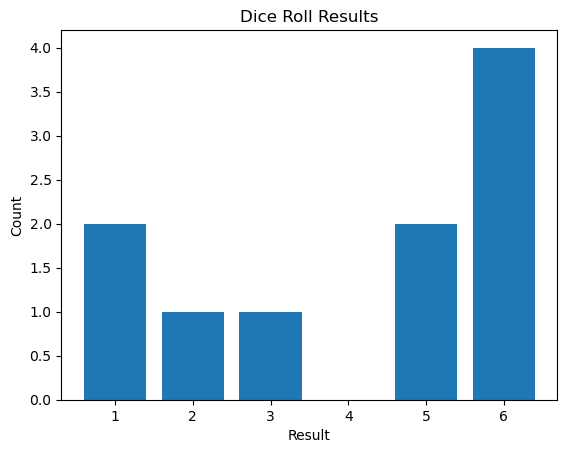

In [3]:
# your code here

dice_results = roll_dice()
print(dice_results)


result_counts = dice_results['Result'].value_counts(sort=False)
plt.bar(result_counts.index, result_counts.values)
plt.title('Dice Roll Results')
plt.xlabel('Result')
plt.ylabel('Count')
plt.show()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

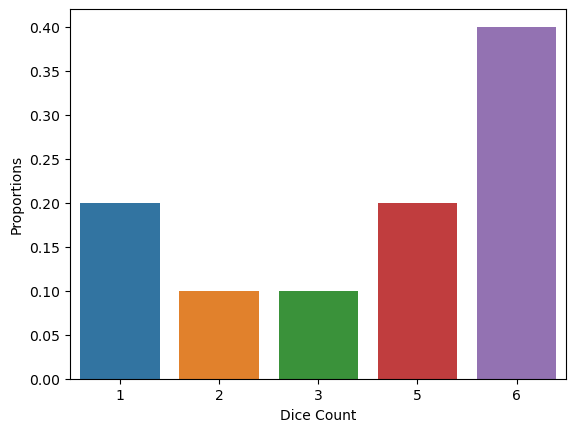

In [4]:
# your code here

result_counts_df = pd.DataFrame(result_counts).reset_index().rename(columns={'index': 'Dice Count'})
result_counts_df = result_counts_df.sort_values(by='Result', ascending=False)
result_counts_df['Proportions'] = (result_counts_df['Result']/sum(result_counts_df['Result']))
result_counts_df

ax = sns.barplot(x='Dice Count', y='Proportions', data=result_counts_df, orient='v')
plt.show()

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [5]:
# your code here

def dice_mean_1(column_total_observations):
    return sum(column_total_observations)/len(column_total_observations)

dice_mean_1(dice_results['Result'])

4.1

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [6]:
# your code here

def dice_mean_2(column_dice_count,column_result):
    return sum([column_dice_count[i]*column_result[i] for i in range(len(column_dice_count))]) / sum(column_result)

dice_mean_2(result_counts_df['Dice Count'],result_counts_df['Result'])

4.1

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [7]:
# your code here

def dice_median(column_results):    
    sorted_values = np.sort(column_results)
    if (len(sorted_values) % 2) == 0:
        return (sorted_values[int((len(sorted_values)/2)-1)] + sorted_values[int(len(sorted_values)/2)])/2
    else:
        return sorted_values[floor(len(sorted_values)/2)]
    
dice_median(dice_results['Result'])

5.0

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [8]:
# your code here

def calculate_quartiles(data):
    # Sort the data in ascending order
    sorted_data = sorted(data)
    
    # Calculate the position of Q1, Q2, and Q3
    n = len(sorted_data)
    q1_pos = int(n/4)
    q3_pos = int(3*n/4)
    
    # Calculate the values of Q1, Q2, and Q3
    q1 = sorted_data[q1_pos]
    q2 = int(dice_median(data))
    q3 = sorted_data[q3_pos]
    
    # Return the quartile values as a dictionary
    return {'Q1': q1, 'Q2': q2, 'Q3': q3, 'Q4': sorted_data[-1]}

calculate_quartiles(dice_results['Result'])

{'Q1': 2, 'Q2': 5, 'Q3': 6, 'Q4': 6}

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

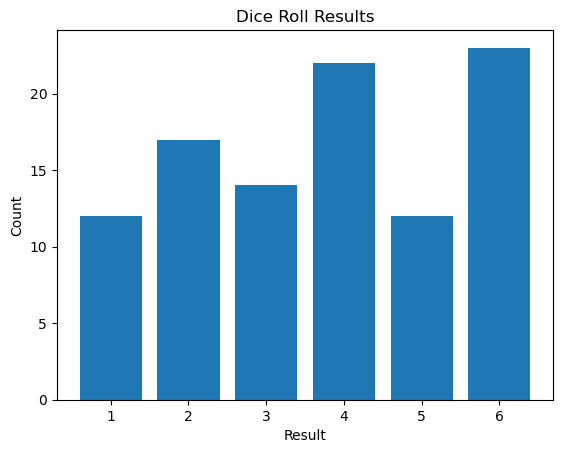

In [9]:
# your code here

path = '../data/roll_the_dice_hundred.csv'
roll_the_dice_hundred = pd.read_csv(path)
roll_the_dice_hundred = roll_the_dice_hundred.sort_values(by='value')
roll_the_dice_hundred.head(20)

result_counts = roll_the_dice_hundred['value'].value_counts(sort=False)
plt.bar(result_counts.index, result_counts.values)
plt.title('Dice Roll Results')
plt.xlabel('Result')
plt.ylabel('Count')
plt.show()

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [10]:
# your code here

dice_mean_1(roll_the_dice_hundred['value'])

3.74

#### 3.- Now, calculate the frequency distribution.


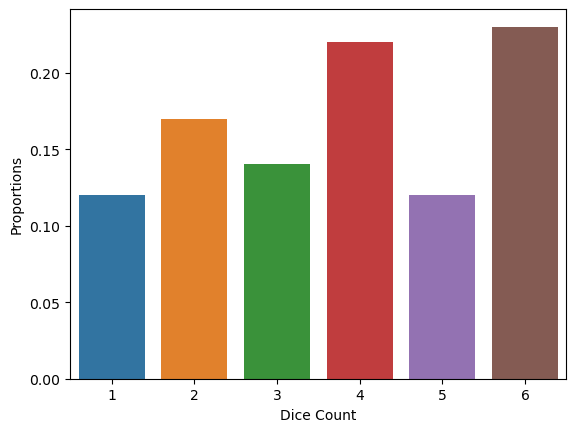

In [11]:
# your code here


result_counts_df = pd.DataFrame(result_counts).reset_index().rename(columns={'index': 'Dice Count'})
result_counts_df

result_counts_df = result_counts_df.sort_values(by='value', ascending=False)
result_counts_df['Proportions'] = (result_counts_df['value']/sum(result_counts_df['value']))
result_counts_df

ax = sns.barplot(x='Dice Count', y='Proportions', data=result_counts_df, orient='v')
plt.show()


#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

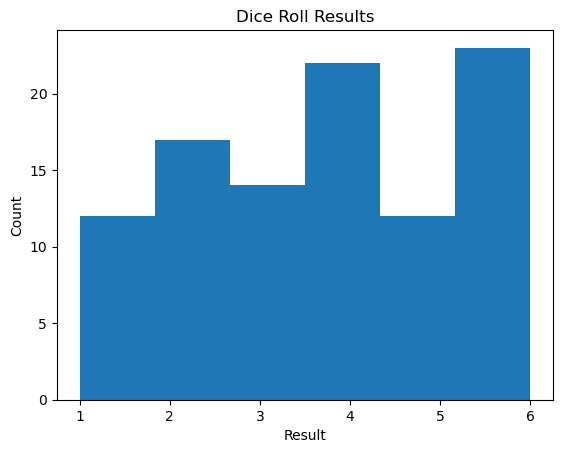

1    12
2    17
3    14
4    22
5    12
6    23
Name: value, dtype: int64

In [12]:
# your code here

# Get the value counts for each dice roll result
result_counts = roll_the_dice_hundred['value'].value_counts(sort=False)

# Create the histogram plot
plt.hist(roll_the_dice_hundred['value'], bins=6)

# Add plot labels and title
plt.title('Dice Roll Results')
plt.xlabel('Result')
plt.ylabel('Count')

# Show the plot
plt.show()

display(result_counts)

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

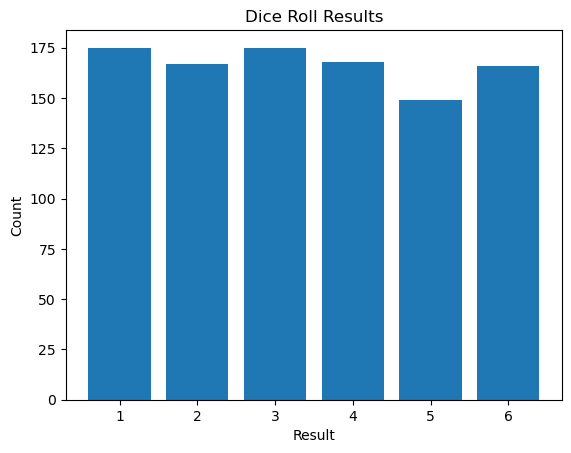

In [13]:
# your code here

path = '../data/roll_the_dice_thousand.csv'
roll_the_dice_thousand = pd.read_csv(path)
roll_the_dice_thousand = roll_the_dice_thousand.sort_values(by='value')
roll_the_dice_thousand.head(20)

result_counts = roll_the_dice_thousand['value'].value_counts(sort=False)
plt.bar(result_counts.index, result_counts.values)
plt.title('Dice Roll Results')
plt.xlabel('Result')
plt.ylabel('Count')
plt.show()

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

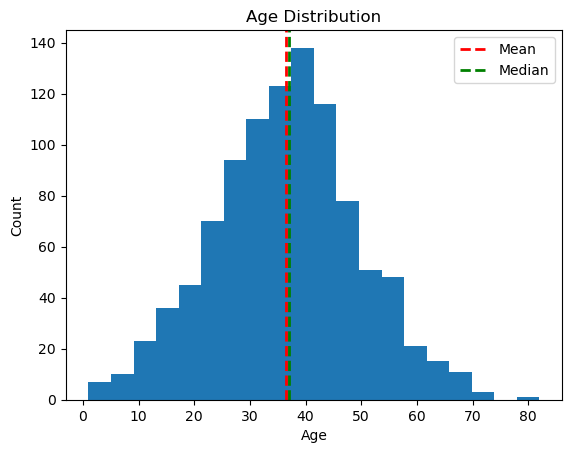

In [14]:
# your code here

path = '../data/ages_population.csv'
ages_population = pd.read_csv(path)
ages_population

result_counts = ages_population['observation'].value_counts(sort=False)
result_counts_df = pd.DataFrame(result_counts).reset_index().rename(columns={'observation': 'frequency'})
result_counts_df

# Calculate mean and median
mean_age = ages_population['observation'].mean()
median_age = ages_population['observation'].median()
std_age = ages_population['observation'].std()

# Create the histogram plot
plt.hist(ages_population['observation'], bins=20)

# Add plot labels and title
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

# Add vertical lines for mean and median
plt.axvline(x=mean_age, color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(x=median_age, color='green', linestyle='dashed', linewidth=2, label='Median')

# Add legend
plt.legend()

# Show the plot
plt.show()

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [15]:
# your code here

ages_population['observation'].describe()

count    1000.0000
mean       36.5600
std        12.8165
min         1.0000
25%        28.0000
50%        37.0000
75%        45.0000
max        82.0000
Name: observation, dtype: float64

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

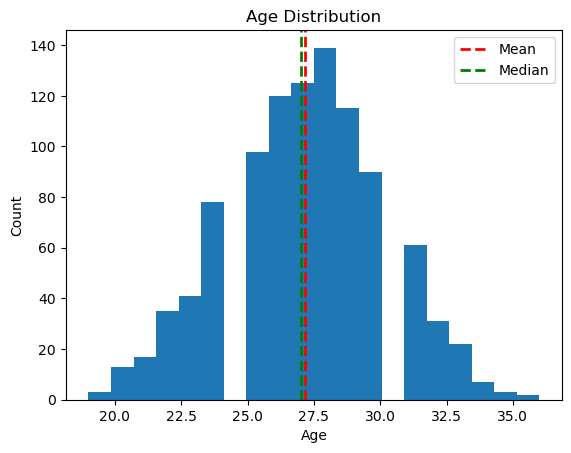

In [16]:
# your code here

path = '../data/ages_population2.csv'
ages_population2 = pd.read_csv(path)
ages_population2

result_counts = ages_population2['observation'].value_counts(sort=False)
result_counts_df = pd.DataFrame(result_counts).reset_index().rename(columns={'observation': 'frequency'})
result_counts_df

# Calculate mean and median
mean_age = ages_population2['observation'].mean()
median_age = ages_population2['observation'].median()
std_age = ages_population2['observation'].std()

# Create the histogram plot
plt.hist(ages_population2['observation'], bins=20)

# Add plot labels and title
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

# Add vertical lines for mean and median
plt.axvline(x=mean_age, color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(x=median_age, color='green', linestyle='dashed', linewidth=2, label='Median')

# Add legend
plt.legend()

# Show the plot
plt.show()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

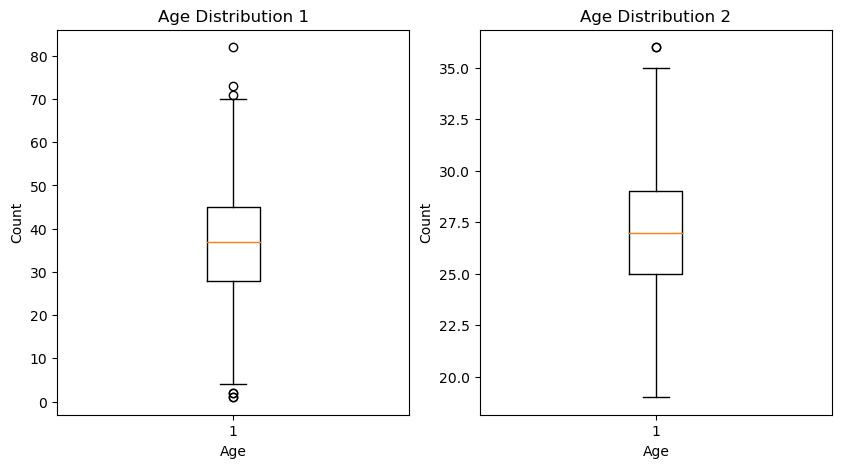

In [17]:
# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Plot the first boxplot in the first subplot
axes[0].boxplot(ages_population['observation'])
axes[0].set_title('Age Distribution 1')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')

# Plot the second boxplot in the second subplot
axes[1].boxplot(ages_population2['observation'])
axes[1].set_title('Age Distribution 2')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Count')

# Show the plot
plt.show()

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [18]:
# your code here

df1 = pd.DataFrame(ages_population['observation'].describe()).rename(columns={'observation': 'ages_population'})
df2 = pd.DataFrame(ages_population2['observation'].describe()).rename(columns={'observation': 'ages_population2'})
df_1_vs_2 = df1.merge(df2, on=df1.index)
df_1_vs_2 = df_1_vs_2.rename(columns={'key_0': 'descriptive'})
display(df_1_vs_2)

,descriptive,ages_population,ages_population2
0,count,1000.0000,1000.000000
1,mean,36.5600,27.155000
2,std,12.8165,2.969814
3,min,1.0000,19.000000
4,25%,28.0000,25.000000
5,50%,37.0000,27.000000
6,75%,45.0000,29.000000
7,max,82.0000,36.000000


## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [19]:
# your code here

path = '../data/ages_population3.csv'
ages_population3 = pd.read_csv(path)
ages_population3

,observation
0,21.0
1,21.0
2,24.0
3,31.0
4,54.0
...,...
995,16.0
996,55.0
997,30.0
998,35.0


#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

,descriptive,ages_population,ages_population3
0,count,1000.0000,1000.000000
1,mean,36.5600,41.989000
2,std,12.8165,16.144706
3,min,1.0000,1.000000
4,25%,28.0000,30.000000
5,50%,37.0000,40.000000
6,75%,45.0000,53.000000
7,max,82.0000,77.000000


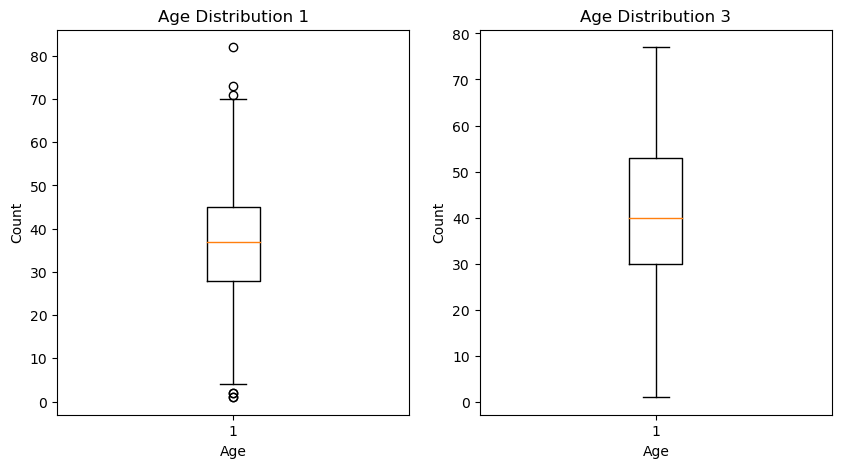

In [20]:
# your code here

df1 = pd.DataFrame(ages_population['observation'].describe()).rename(columns={'observation': 'ages_population'})
df3 = pd.DataFrame(ages_population3['observation'].describe()).rename(columns={'observation': 'ages_population3'})
df_1_vs_3 = df1.merge(df3, on=df1.index)
df_1_vs_3 = df_1_vs_3.rename(columns={'key_0': 'descriptive'})
display(df_1_vs_3)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

axes[0].boxplot(ages_population['observation'])
axes[0].set_title('Age Distribution 1')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')

axes[1].boxplot(ages_population3['observation'])
axes[1].set_title('Age Distribution 3')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Count')

plt.show()

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [21]:
# your code here

df1 = pd.DataFrame(ages_population['observation'].describe()).rename(columns={'observation': 'ages_population'})
df3 = pd.DataFrame(ages_population3['observation'].describe()).rename(columns={'observation': 'ages_population3'})
df_1_vs_3 = df1.merge(df3, on=df1.index)
df_1_vs_3 = df_1_vs_3.rename(columns={'key_0': 'descriptive'})
display(df_1_vs_3)

,descriptive,ages_population,ages_population3
0,count,1000.0000,1000.000000
1,mean,36.5600,41.989000
2,std,12.8165,16.144706
3,min,1.0000,1.000000
4,25%,28.0000,30.000000
5,50%,37.0000,40.000000
6,75%,45.0000,53.000000
7,max,82.0000,77.000000


#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [22]:
# your code here

display(df_1_vs_3)

print("Mode - Ages Population")
print(int(ages_population['observation'].mode()))
print("\nMode - Ages Population 3")
print(int(ages_population3['observation'].mode()))

print("\nIQR - Ages Population")
print(df_1_vs_3['ages_population'][6] - df_1_vs_3['ages_population'][4])
print("\nIQR - Ages Population 3")
print(df_1_vs_3['ages_population3'][6] - df_1_vs_3['ages_population3'][4])

,descriptive,ages_population,ages_population3
0,count,1000.0000,1000.000000
1,mean,36.5600,41.989000
2,std,12.8165,16.144706
3,min,1.0000,1.000000
4,25%,28.0000,30.000000
5,50%,37.0000,40.000000
6,75%,45.0000,53.000000
7,max,82.0000,77.000000


Mode - Ages Population
39

Mode - Ages Population 3
32

IQR - Ages Population
17.0

IQR - Ages Population 3
23.0
